# Checking in on Runs
## June 4th, 2017
### MSP 

What's been going on with runs so far this season?

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline

In [3]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position

def read_team_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG"),\
                         'formats': ('S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4')},\
                 skip_header=1,delimiter=',')
    return BatData


Teams2017 = read_team_batting_data('2017Batting/0604_teams.csv')

def read_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')
    return BatData


# 70 PA+ only
Total2017   = read_batting_data('2017Batting/2017_0604.csv')


Let's get our bearings by looking at global team and player data.

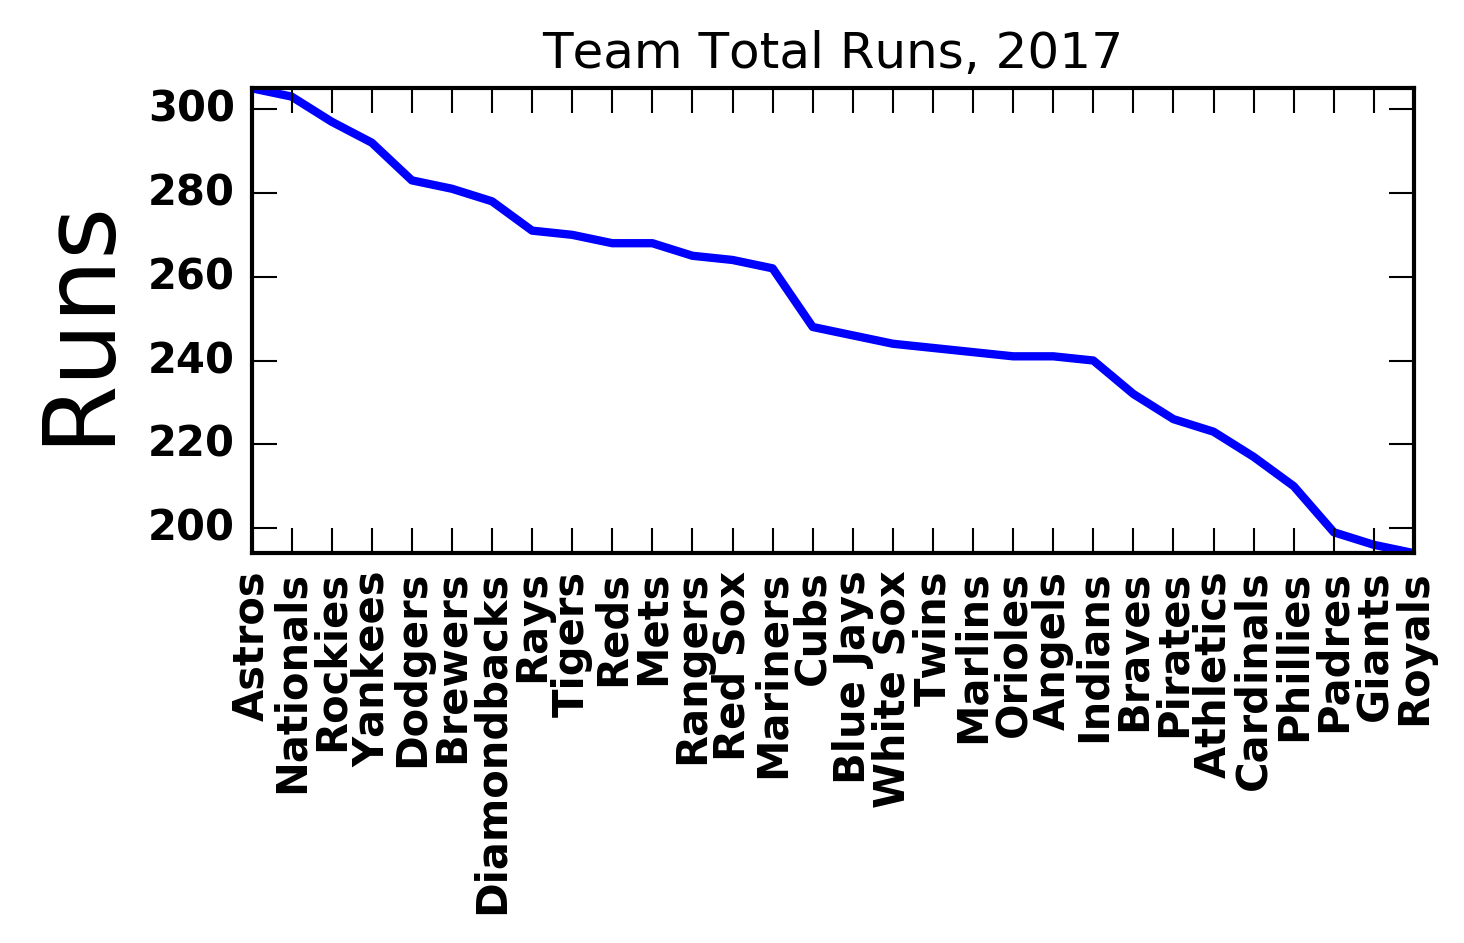

In [4]:
team_runs = Teams2017['R']
team_name = Teams2017['Team']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,team_runs.size,team_runs.size),team_runs[(-1.*team_runs).argsort()])
plt.ylabel('Runs',size=24)
plt.title('Team Total Runs, 2017')
_ = plt.axis([1.,30.,np.min(team_runs),np.max(team_runs)])

# You can specify a rotation for the tick labels in degrees or with keywords.
_ = plt.xticks(np.linspace(1,30,30), team_name[(-1.*team_runs).argsort()], rotation='vertical')

Anyone think that Coors inflates run totals?

The team rankings makes me think that we'll want to put some sort of caveat on looking at individual stats based on the team they are on. Let's start looking at individual players by setting up a ranking within the league.

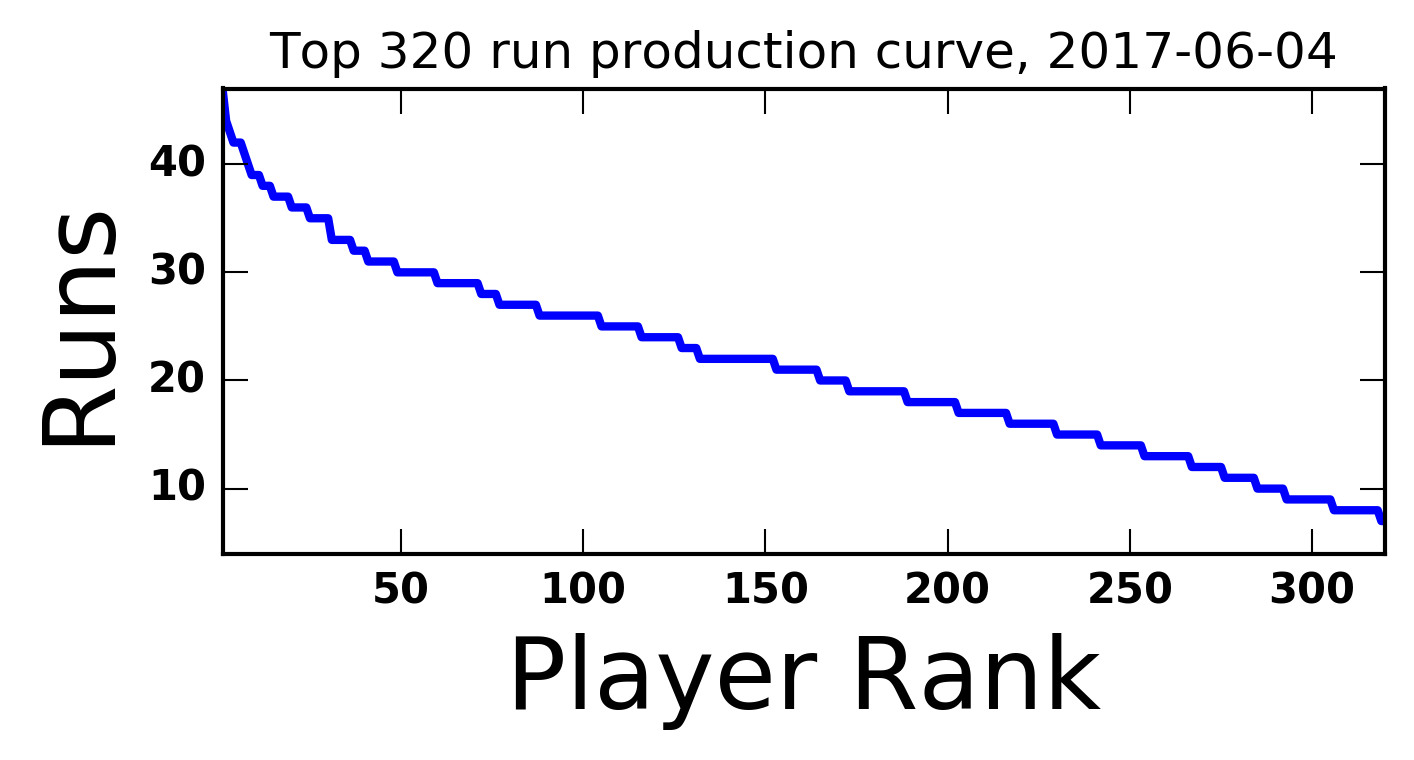

In [5]:
runs = Total2017['R']
pas = Total2017['PA']
names = Total2017['Name']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,runs.size,runs.size),runs[(-1.*runs).argsort()])
plt.xlabel('Player Rank',size=24)
plt.ylabel('Runs',size=24)
plt.title('Top 320 run production curve, 2017-06-04')
_ = plt.axis([1.,320.,np.min(runs),np.max(runs)])

#### What to notice? 

This curve already has the characteristic upturn at the high end!



Earlier in the season (podcast 1.01), I talked about some correlations that popped up in the preseason predictions, particularly regarding R/AB vs OBP. It's time to revist!

When last we checked in, the principle OBP guys were:
1. Mike Trout
2. Bryce Harper
3. Paul Goldschmidt
4. Joey Votto
5. Miguel Cabrera
6. Freddie Freeman

with Trout being the only one expected to be above the MLB R/PA vs OBP relation. What's up now?

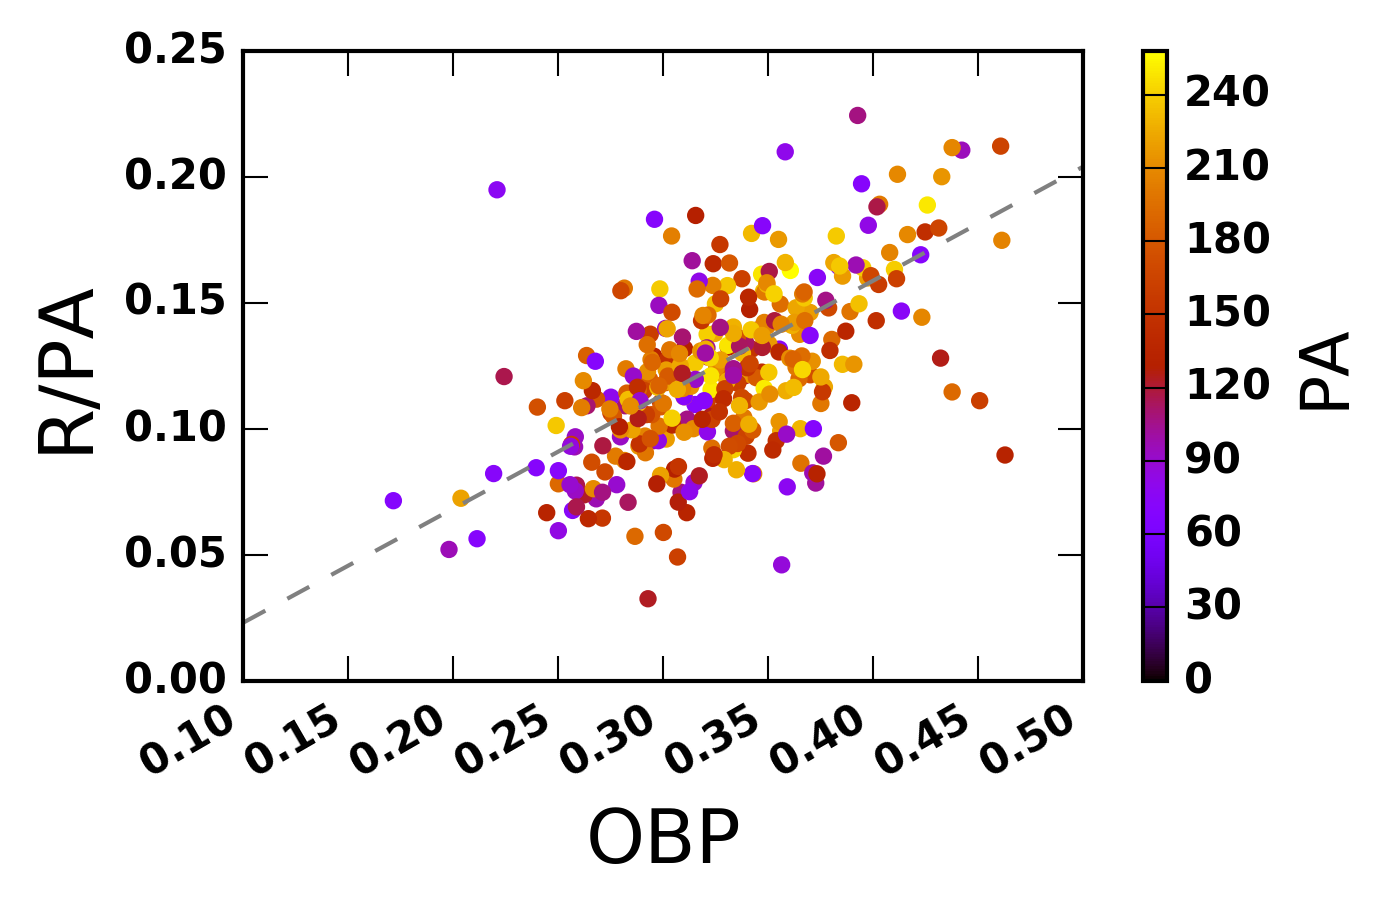

In [6]:
fig = plt.figure(figsize=(4,3))

ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

obp = (Total2017['H']+Total2017['BB']+Total2017['HBP'])/Total2017['PA']
rpa = Total2017['R']/Total2017['PA']
clrs= Total2017['PA']/np.max(Total2017['PA'])

ax.scatter(obp,rpa,color=cm.gnuplot(clrs,1.),s=10.)
ax.set_xlabel('OBP',size=18)
ax.set_ylabel('R/PA',size=18)



cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0., vmax=np.max(Total2017['PA']))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('PA',size=16)
#cb1.set_ticks([90,93,96,99])


ax.axis([.1,.5,0.,0.25])



# fit a linear model to valid values
goodw = np.where(Total2017['PA'] > 200.)[0]
c = np.polyfit(obp[goodw],rpa[goodw],1)
d = np.poly1d(c)
ax.plot(np.linspace(0.1,0.6,100),d(np.linspace(0.1,0.6,100)),color='gray',lw=1.,linestyle='dashed')

for label in ax.get_xticklabels(): label.set_rotation(30); label.set_horizontalalignment("right")



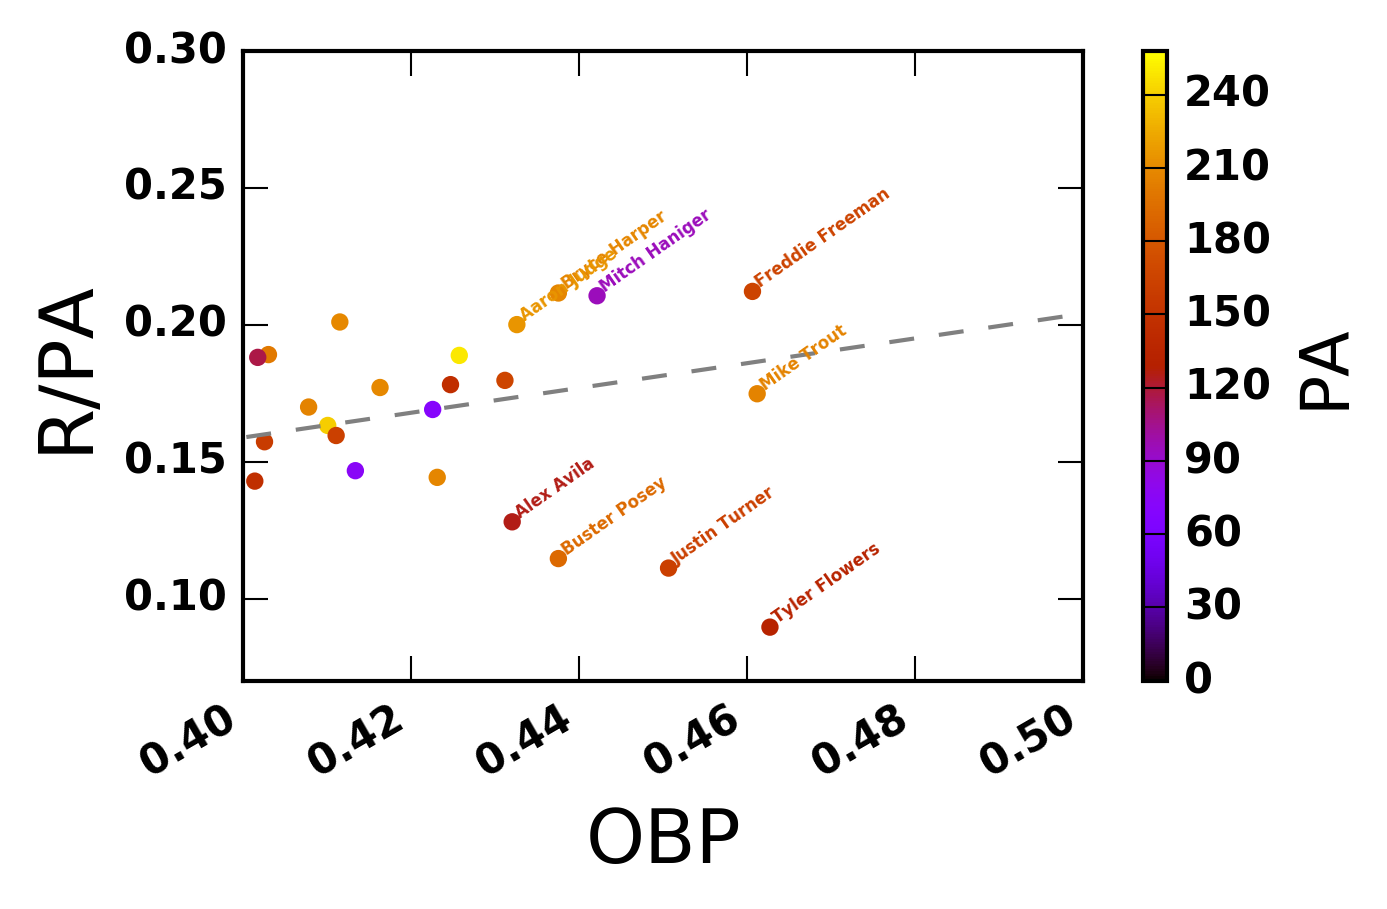

In [7]:
fig

ax.axis([0.4,0.5,0.07,0.3])

for indx in range(0,len(Total2017['Name'])):
    if (obp[indx] >= .432) & (rpa[indx] < 2.2):
        ax.text(obp[indx],rpa[indx],Total2017['Name'][indx],size=4,rotation=35.,ha='left',va='bottom',color=cm.gnuplot(clrs[indx],1.))




fig

The agreement could certainly be worse! Trout, Freeman, and Harper  are up there, along with **MY BOY TYLER FLOWERS**. Now, you'd never use Flowers because he never plays (hence why I kept the coloring in there), but still. Same goes for Alex Avila and Mitch Haniger, with Justin Turner teetering on the edge of usable (coming back from DL week of 6-13 maybe?).

Joey Votto is over in the unlabeled dots, as is Paul Goldschmidt, but not so much that you'd be worried about either (OBP > .400 is still a big deal)

The primary addition is **Aaron Judge**, who is a monster. Posey flirts with good numbers every year, he's just on the positive end right now.

As a general takeaway--preseason predictions only had four guys going over .400 in OBP, there are...many more on this list. The perils of preseason!


### Alternate Targets

Okay, stick with me for a second here, I'm going to smush a couple steps together. I'm going to remove the linear relationship we found above, and then plot only the guys who are overproducing on R/PA, hoping that we can use OBP to help target some guys that are valuable Runs producers for whatever reason.

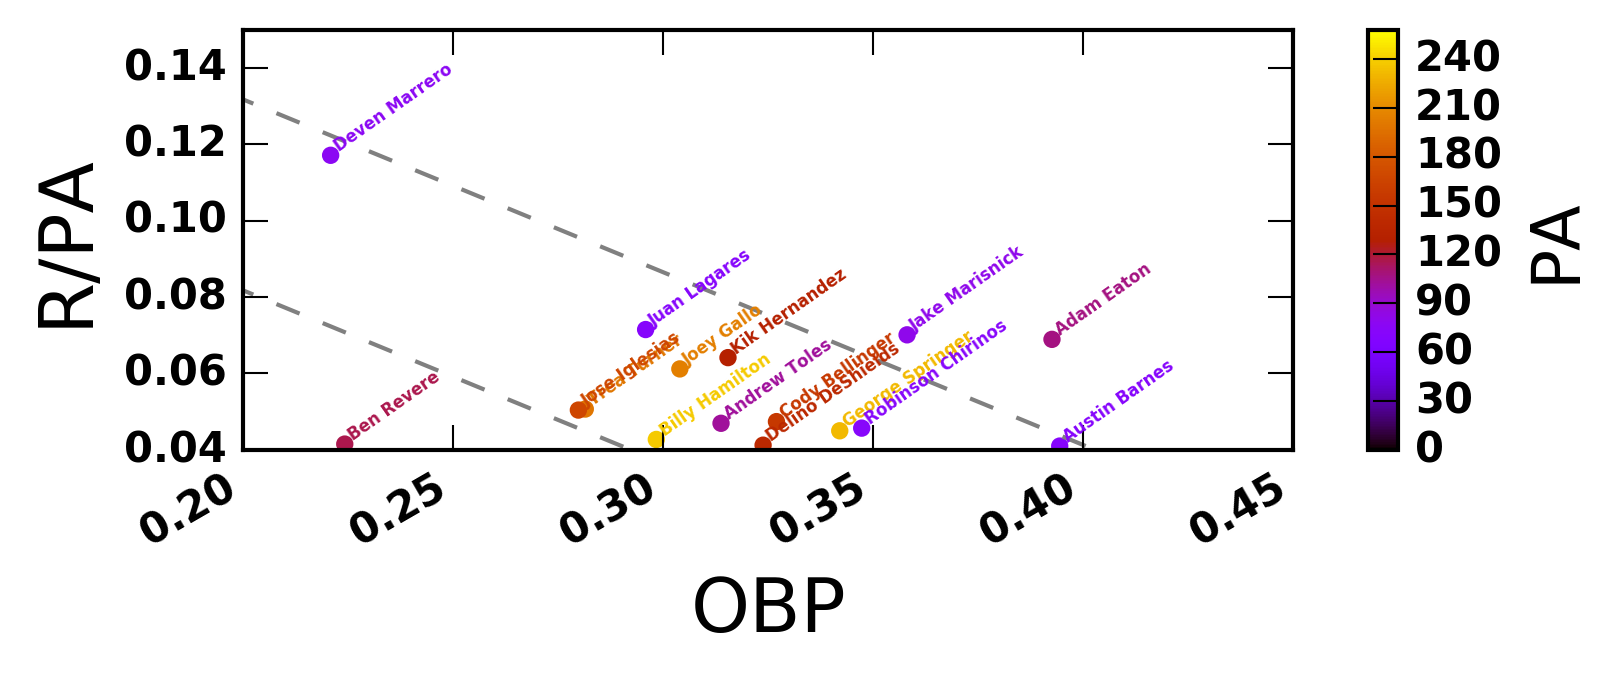

In [8]:
fig = plt.figure(figsize=(5,2))

ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

obp = (Total2017['H']+Total2017['BB']+Total2017['HBP'])/Total2017['PA']
rpa = Total2017['R']/Total2017['PA']
clrs= Total2017['PA']/np.max(Total2017['PA'])


# fit a linear model to valid values
goodw = np.where(Total2017['PA'] > 200.)[0]
c = np.polyfit(obp[goodw],rpa[goodw],1)
d = np.poly1d(c)


ax.scatter(obp,rpa-d(obp),color=cm.gnuplot(clrs,1.),s=10.)
ax.set_xlabel('OBP',size=18)
ax.set_ylabel('R/PA',size=18)



cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0., vmax=np.max(Total2017['PA']))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('PA',size=16)
#cb1.set_ticks([90,93,96,99])


ax.axis([.2,.45,0.04,0.15])

ax.plot(np.linspace(0.1,0.6,100),0.2-d(np.linspace(0.1,0.6,100)),color='gray',lw=1.,linestyle='dashed')
ax.plot(np.linspace(0.1,0.6,100),0.15-d(np.linspace(0.1,0.6,100)),color='gray',lw=1.,linestyle='dashed')
ax.plot(np.linspace(0.1,0.6,100),0.1-d(np.linspace(0.1,0.6,100)),color='gray',lw=1.,linestyle='dashed')



#ax.plot(np.linspace(0.1,0.6,100),d(np.linspace(0.1,0.6,100)),color='gray',lw=1.,linestyle='dashed')

for label in ax.get_xticklabels(): label.set_rotation(30); label.set_horizontalalignment("right")


for indx in range(0,len(Total2017['Name'])):
    if (rpa[indx] - d(obp[indx]) >= .04) & (rpa[indx] > .12):
        #print Total2017['Name'][indx]
        ax.text(obp[indx],rpa[indx]-d(obp[indx]),Total2017['Name'][indx],size=4,rotation=35.,ha='left',va='bottom',color=cm.gnuplot(clrs[indx],1.))





I'd take any of these guys if I thought they were going to get playing time, except for KikAc Hernandez, I don't understand him at all.

The guys in blue are good to watch out for in case their playing time climbs; the guys in orange to yellow are valuable runs specialists.